Group explanations
===========

This examples shows the results for privileged and disadvantaged groups.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

from sharp import ShaRP
from sharp.utils import check_inputs

X, y = fetch_openml(
    data_id=43141, parser="auto", return_X_y=True, read_csv_kwargs={"nrows": 150}
)

In [14]:
privil_group_indexes, protec_group_indexes = X[X["SEX"] == 1].index, X[X["SEX"] == 2].index

In [19]:
numerical_cols = ["AGEP", "WKHP"]
ordinal_cols = ["SCHL"]

X = X.filter(items=numerical_cols + ordinal_cols)

X.head()

,AGEP,WKHP,SCHL
0,18.0,21.0,18.0
1,53.0,40.0,17.0
2,41.0,40.0,16.0
3,18.0,2.0,18.0
4,21.0,50.0,19.0


In [20]:
def score_function(X):
    X, _ = check_inputs(X)
    # AGEP, WKHP, SCHL
    return 0.2 * X[:, 0] + 0.3 * X[:, 1] + 0.5 * X[:, 2]


# Standardize X and calculate scores
scaler = MinMaxScaler()
X.iloc[:, :] = scaler.fit_transform(X)
scores = score_function(X)

In [2]:
privil_group, protec_group = X[X["SEX"] == 1], X[X["SEX"] == 2]

In [24]:
xai = ShaRP(
    qoi="rank",
    target_function=score_function,
    measure="shapley",
    sample_size=None,
    replace=False,
    random_state=42,
    n_jobs=-1,
)

xai.fit(X)

contributions = xai.all(X)

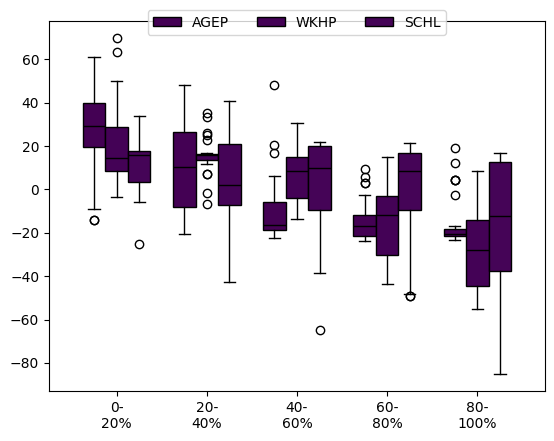

In [26]:
xai.plot.strata_boxplot(X, scores, contributions)

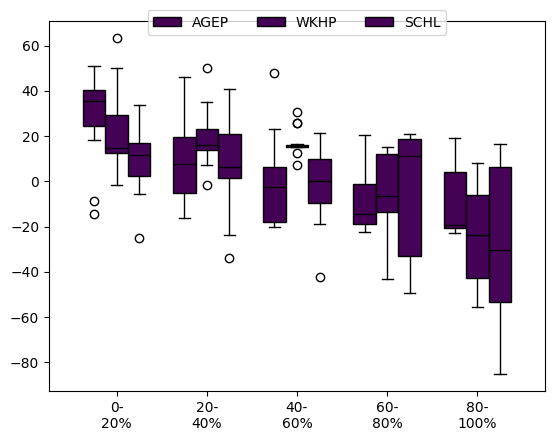

In [28]:
xai.plot.strata_boxplot(X.loc[privil_group_indexes], scores[privil_group_indexes], contributions[privil_group_indexes])

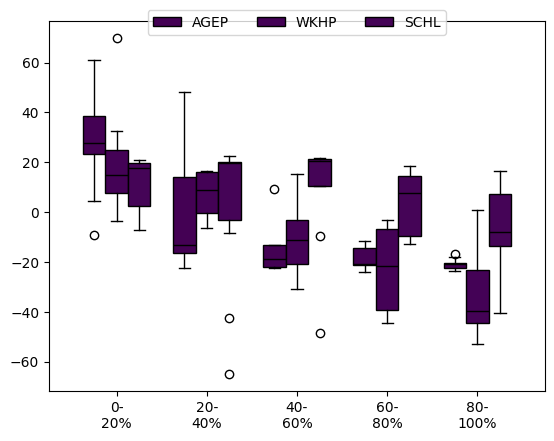

In [29]:
xai.plot.strata_boxplot(X.loc[protec_group_indexes], scores[protec_group_indexes], contributions[protec_group_indexes])